In [424]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas_profiling
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [425]:
data = pd.read_csv('C:\\Analytix\\Git\\Analytix\\Projects\\3. Network Intrusion Detection System\\NSL_Dataset\\train.txt',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [426]:
data.columns = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land", "wrong_fragment","urgent","hot","num_failed_logins","logged_in", "num_compromised","root_shell","su_attempted","num_root","num_file_creations", "num_shells","num_access_files","num_outbound_cmds","is_host_login", "is_guest_login","count","srv_count","serror_rate", "srv_serror_rate", "rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate", "dst_host_diff_srv_rate","dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate", "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [427]:
data.info(max_cols=45)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
duration                       125973 non-null int64
protocol_type                  125973 non-null object
service                        125973 non-null object
flag                           125973 non-null object
src_bytes                      125973 non-null int64
dst_bytes                      125973 non-null int64
land                           125973 non-null int64
wrong_fragment                 125973 non-null int64
urgent                         125973 non-null int64
hot                            125973 non-null int64
num_failed_logins              125973 non-null int64
logged_in                      125973 non-null int64
num_compromised                125973 non-null int64
root_shell                     125973 non-null int64
su_attempted                   125973 non-null int64
num_root                       125973 non-null int64
num_file_creations             125973 

In [429]:
data.attack.unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [430]:
def MultiNomialTargetFunc(x):
    if x in ['back', 'land', 'neptune', 'pod', 'smurf','teardrop','apache2', 'udpstorm', 'processtable', 'worm']:
        return "DoS"
    elif x in ['satan', 'ipsweep', 'nmap', 'portsweep', 'mscan', 'saint' ]:
        return "Probe"
    elif x in ['guess_password','guess_passwd', 'ftp_write', 'imap', 'phf', 'multihop', 'warezmaster', 'warezclient', 'spy', 'xlock', 'xsnoop', 'snmpguess', 'snmpgetattack', 'httptunnel', 'sendmail', 'named' ]:
        return "R2L"
    elif x in ['buffer_overflow', 'loadmodule', 'rootkit', 'perl', 'sqlattack', 'xterm', 'ps' ]:
        return "U2R"
    elif x in ['normal']:
        return x
    else:
        print("Category not found for {}".format(x))
        return x

In [431]:
def BinomialTargetFunc(x):
    if x == 'normal':
        return 0
    else:
        return 1

In [432]:
data['target'] = data.attack.apply(lambda x: BinomialTargetFunc(x))
data.drop(columns=['attack'],axis=1, inplace=True)

In [433]:
# profile =  pandas_profiling.ProfileReport(data)
# profile.to_file(outputfile='profile.html')

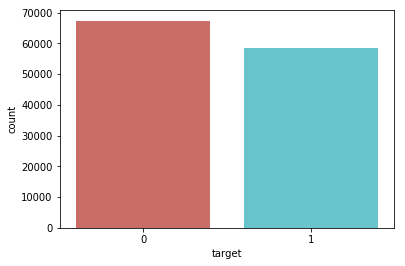

In [434]:
sns.countplot(x='target',data=data, palette='hls')
plt.show()

Identifying relationshipes between Y and X

In [435]:
data.groupby('target').mean()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
target,,,,,,,,,,,,,,,,,,,,,
0,168.587396,13133.279331,4329.685223,0.000104,0.000000,0.000148,0.230655,0.001381,0.710646,0.507076,...,190.285761,0.811875,0.040134,0.121726,0.025996,0.013930,0.006116,0.046589,0.044698,20.31592
1,423.320689,82820.141327,37524.482159,0.000307,0.048746,0.000068,0.174262,0.001040,0.034027,0.017568,...,29.929081,0.187417,0.132131,0.178993,0.040062,0.595177,0.591329,0.201810,0.207008,18.57155


In [436]:
nominal_vars = ['protocol_type', 'service', 'flag']
binary_vars = ['land', 'logged_in', 'root_shell', 'su_attempted', 'is_host_login', 'is_guest_login']
target = ['target']
numeric = data.columns.difference(nominal_vars + binary_vars + target)

In [438]:
categorical = nominal_vars + binary_vars + target

In [440]:
data_num = data[numeric]
data_cat = data[categorical]

In [441]:
def outlierCapping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

In [442]:
def missingImputation(x):
    x = x.fillna(x.mean())
    return x
def missingImputationCat(x):
    x = x.fillna(x.mode())
    return x

In [443]:
data_num = data_num.apply(lambda x: outlierCapping(x))

In [444]:
data_num = data_num.apply(lambda x: missingImputation(x))
data_cat = data_cat.apply(lambda x: missingImputationCat(x.astype('str')))

In [445]:
data[numeric].describe()

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,...,rerror_rate,same_srv_rate,serror_rate,src_bytes,srv_count,srv_diff_host_rate,srv_rerror_rate,srv_serror_rate,urgent,wrong_fragment
count,125973.000000,125973.000000,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,84.107555,0.063053,1.977911e+04,182.148945,0.082951,0.118832,0.148379,0.521242,0.284452,115.653005,...,0.119958,0.660928,0.284485,4.556674e+04,27.737888,0.097322,0.121183,0.282485,0.000111,0.022687
std,114.508607,0.180314,4.021269e+06,99.206213,0.188922,0.306557,0.308997,0.448949,0.444784,110.702741,...,0.320436,0.439623,0.446456,5.870331e+06,72.635840,0.259830,0.323647,0.447022,0.014366,0.253530
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000e+00,82.000000,0.000000,0.000000,0.000000,0.050000,0.000000,10.000000,...,0.000000,0.090000,0.000000,0.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.000000,0.000000e+00,255.000000,0.020000,0.000000,0.000000,0.510000,0.000000,63.000000,...,0.000000,1.000000,0.000000,4.400000e+01,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,143.000000,0.060000,5.160000e+02,255.000000,0.070000,0.000000,0.060000,1.000000,1.000000,255.000000,...,0.000000,1.000000,1.000000,2.760000e+02,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,511.000000,1.000000,1.309937e+09,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,...,1.000000,1.000000,1.000000,1.379964e+09,511.000000,1.000000,1.000000,1.000000,3.000000,3.000000


In [446]:
data_num.describe()

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,...,rerror_rate,same_srv_rate,serror_rate,src_bytes,srv_count,srv_diff_host_rate,srv_rerror_rate,srv_serror_rate,urgent,wrong_fragment
count,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.0
mean,84.107658,0.063053,1342.118549,182.148968,0.082951,0.118832,0.148379,0.521242,0.284452,115.653029,...,0.119958,0.660928,0.284485,1029.498123,27.553158,0.097322,0.121183,0.282485,0.0,0.0
std,114.508532,0.180314,3804.294003,99.206169,0.188922,0.306557,0.308997,0.448949,0.444784,110.702716,...,0.320436,0.439623,0.446456,6137.901578,71.420190,0.259830,0.323647,0.447022,0.0,0.0
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,2.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000,0.050000,0.000000,10.000000,...,0.000000,0.090000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,14.000000,0.000000,0.000000,255.000000,0.020000,0.000000,0.000000,0.510000,0.000000,63.000000,...,0.000000,1.000000,0.000000,44.000000,8.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,143.000000,0.060000,516.000000,255.000000,0.070000,0.000000,0.060000,1.000000,1.000000,255.000000,...,0.000000,1.000000,1.000000,276.000000,18.000000,0.000000,0.000000,1.000000,0.0,0.0
max,511.000000,1.000000,25519.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,...,1.000000,1.000000,1.000000,54540.000000,492.000000,1.000000,1.000000,1.000000,0.0,0.0


In [449]:
def createDummyVariables(df,col):
    df_dummy = pd.get_dummies(data=df[col],drop_first=True,prefix=col)
    df = pd.concat([df,df_dummy],axis=1)
    df.drop(col,axis=1,inplace=True)
    return df

In [450]:
data_cat_new = data_cat
for feature in data_cat.columns.difference(['target']):
    data_cat_new = createDummyVariables(data_cat_new,feature)
data_cat_new.info(max_cols=150)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 89 columns):
target                 125973 non-null object
flag_REJ               125973 non-null uint8
flag_RSTO              125973 non-null uint8
flag_RSTOS0            125973 non-null uint8
flag_RSTR              125973 non-null uint8
flag_S0                125973 non-null uint8
flag_S1                125973 non-null uint8
flag_S2                125973 non-null uint8
flag_S3                125973 non-null uint8
flag_SF                125973 non-null uint8
flag_SH                125973 non-null uint8
is_guest_login_1       125973 non-null uint8
is_host_login_1        125973 non-null uint8
land_1                 125973 non-null uint8
logged_in_1            125973 non-null uint8
protocol_type_tcp      125973 non-null uint8
protocol_type_udp      125973 non-null uint8
root_shell_1           125973 non-null uint8
service_X11            125973 non-null uint8
service_Z39_50         125973 non

In [451]:
data_cat_new.head()

,target,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,...,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,su_attempted_1,su_attempted_2
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Feature Selection

In [452]:
temp = data_num.describe().T
temp[temp['std'] == 0]

,count,mean,std,min,25%,50%,75%,max
num_access_files,125973.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_failed_logins,125973.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_file_creations,125973.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_outbound_cmds,125973.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_root,125973.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_shells,125973.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
urgent,125973.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wrong_fragment,125973.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [453]:
data_num.drop(columns=['num_access_files',
                      'num_failed_logins',
                      'num_file_creations',
                      'num_outbound_cmds',
                      'num_root',
                      'num_shells',
                      'urgent',
                      'wrong_fragment'], axis=1, inplace=True)

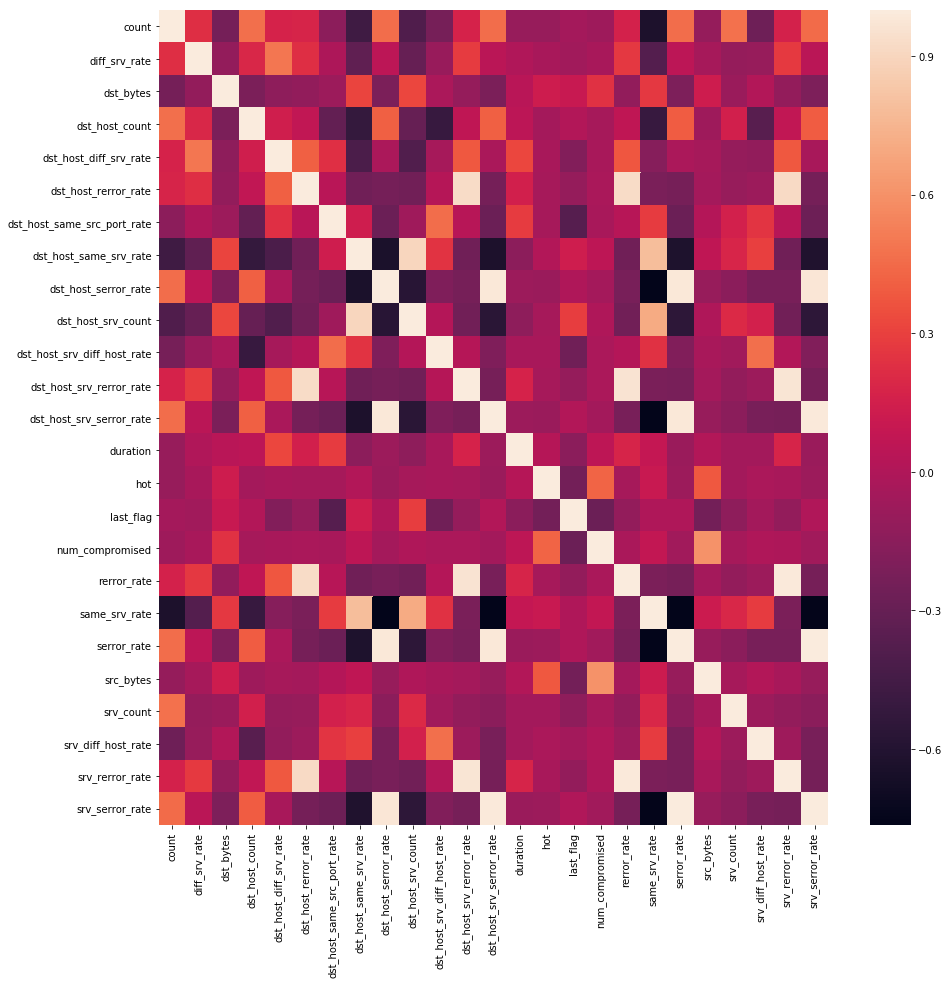

In [454]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data_num.corr())
plt.show()

In [455]:
corrm = data_num.corr()
corrm.to_csv('corrm.csv')

In [458]:
data_num.drop(columns=['dst_host_rerror_rate',
                      'dst_host_serror_rate',
                      'dst_host_srv_rerror_rate',
                      'dst_host_srv_serror_rate',
                      'dst_host_same_srv_rate',
                      'srv_rerror_rate',
                      'srv_serror_rate'], inplace=True, axis=1)

WOE or log odds

In [460]:
data_new = pd.concat([data_num, data_cat_new], axis=1)
data_new.target = pd.to_numeric(data_new.target)
data_new.info(max_cols=150)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 107 columns):
count                          125973 non-null float64
diff_srv_rate                  125973 non-null float64
dst_bytes                      125973 non-null float64
dst_host_count                 125973 non-null float64
dst_host_diff_srv_rate         125973 non-null float64
dst_host_same_src_port_rate    125973 non-null float64
dst_host_srv_count             125973 non-null float64
dst_host_srv_diff_host_rate    125973 non-null float64
duration                       125973 non-null float64
hot                            125973 non-null float64
last_flag                      125973 non-null float64
num_compromised                125973 non-null float64
rerror_rate                    125973 non-null float64
same_srv_rate                  125973 non-null float64
serror_rate                    125973 non-null float64
src_bytes                      125973 non-null float64
srv_coun

C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: divide by zero encountered in log
C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


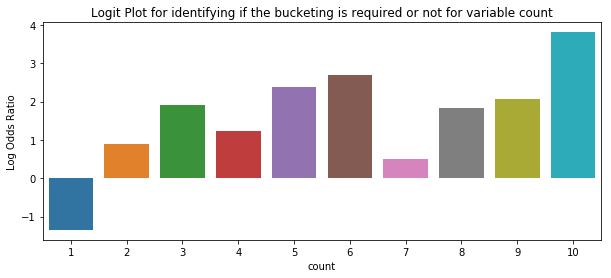

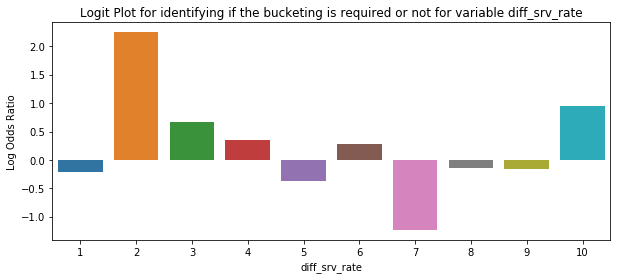

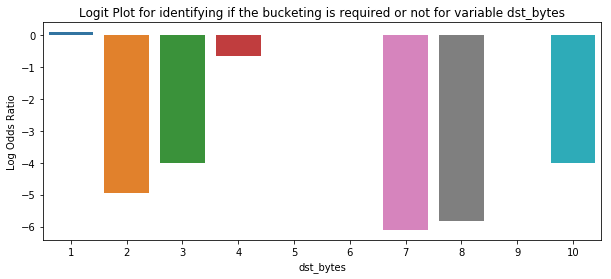

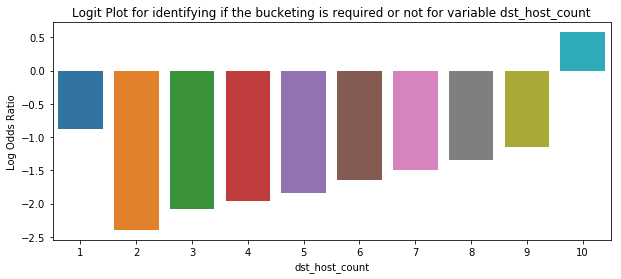

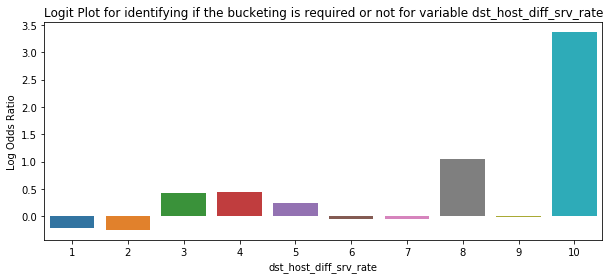

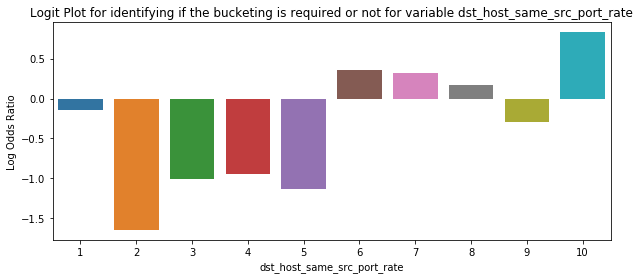

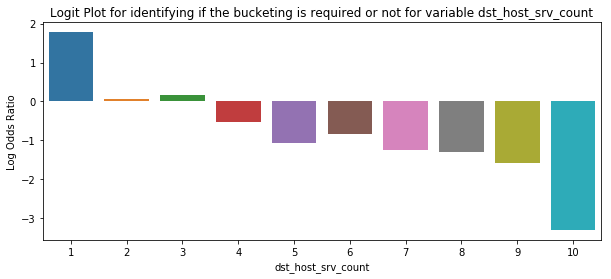

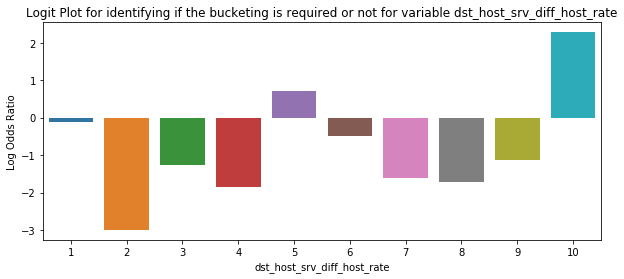

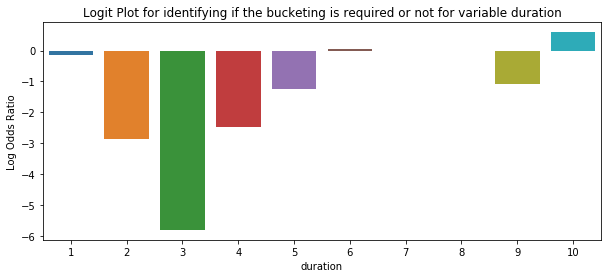

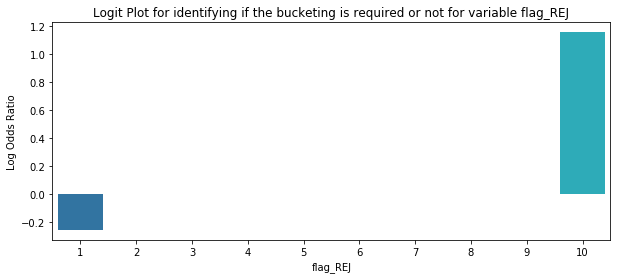

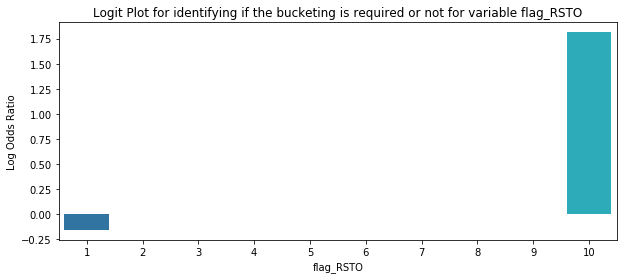

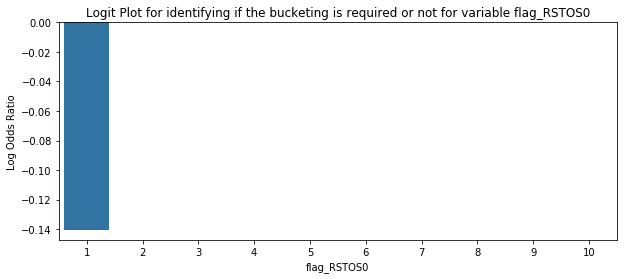

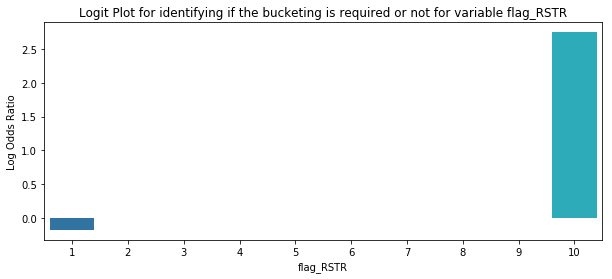

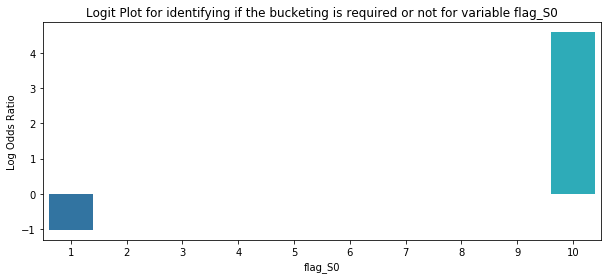

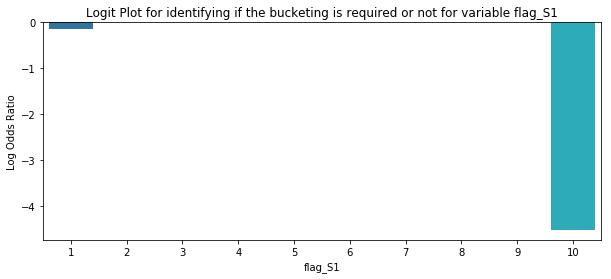

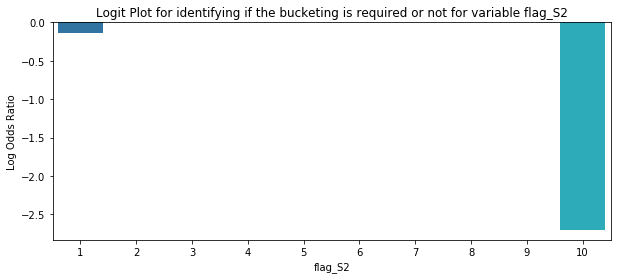

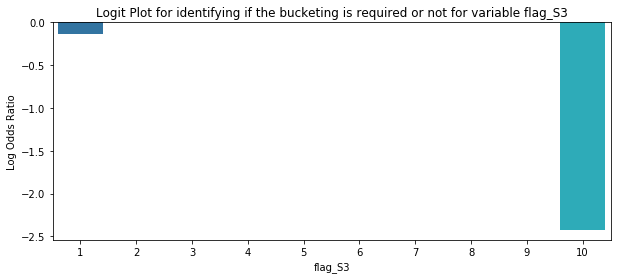

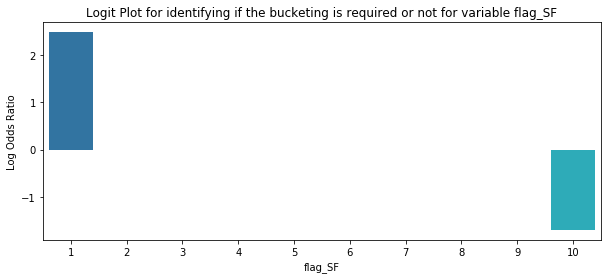

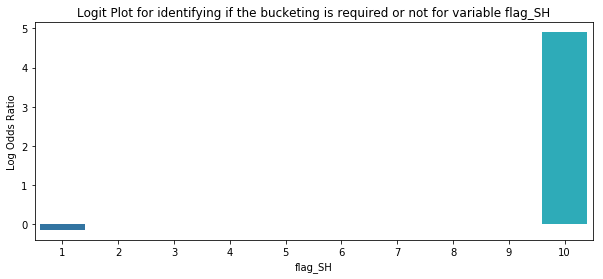

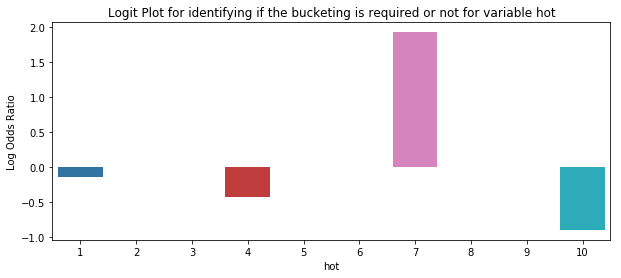

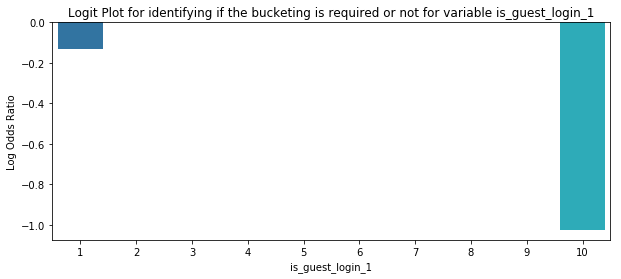

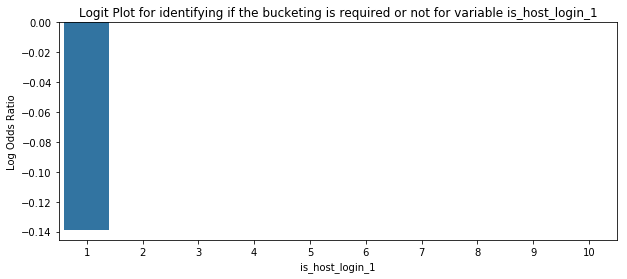

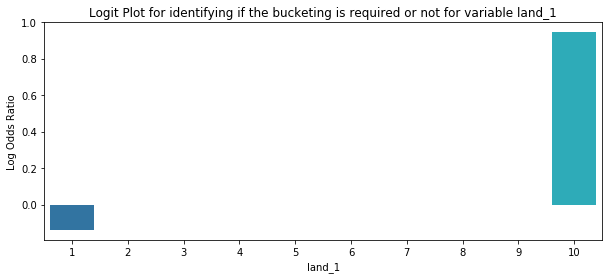

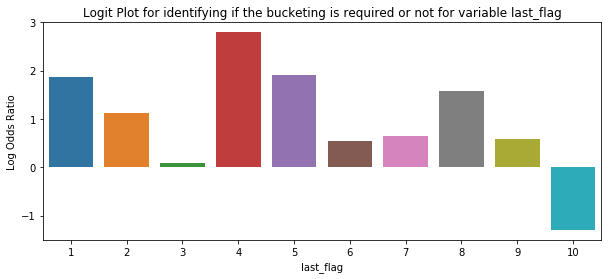

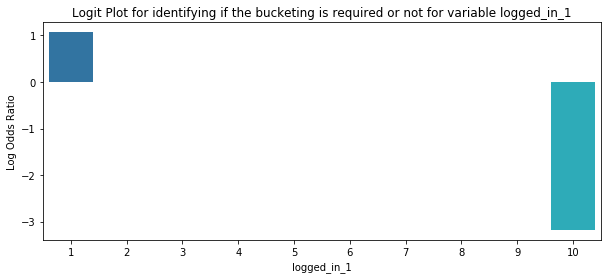

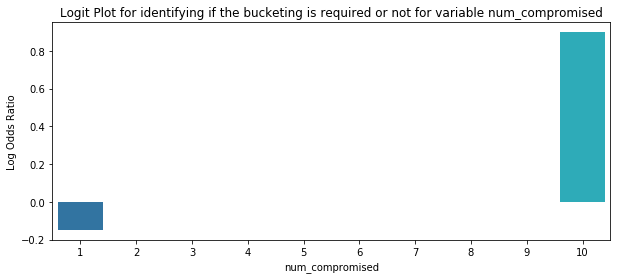

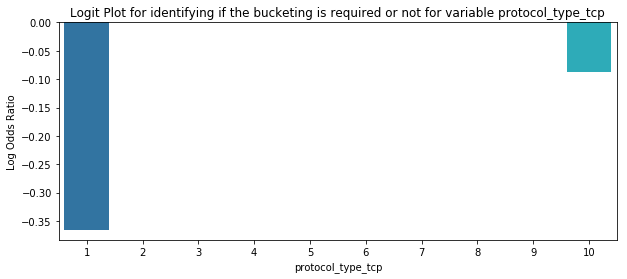

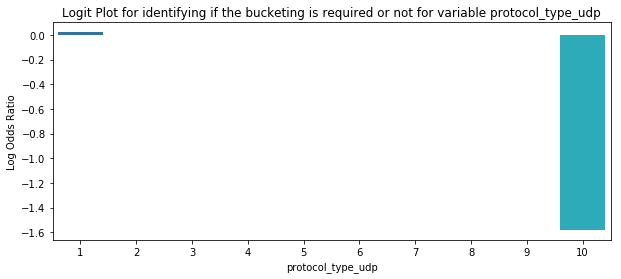

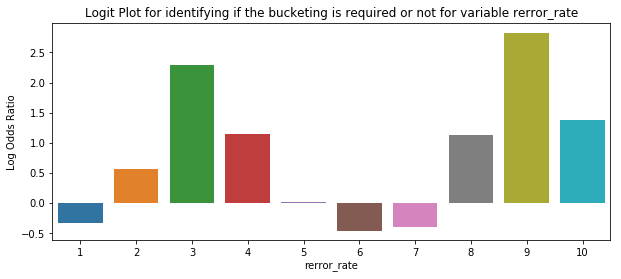

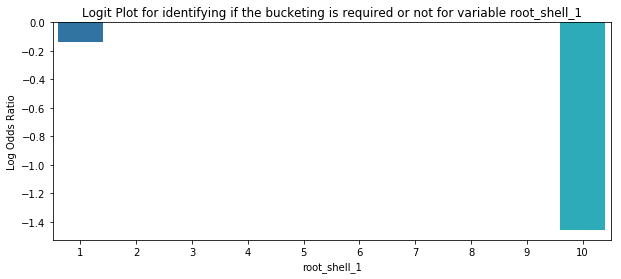

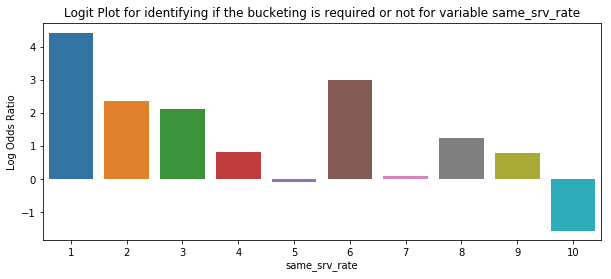

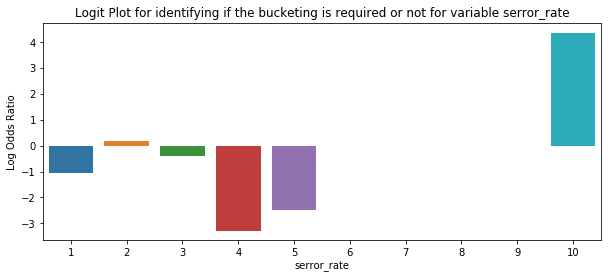

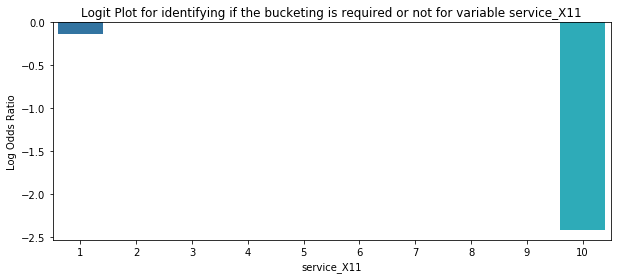

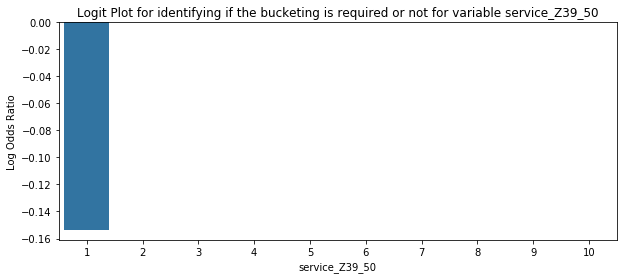

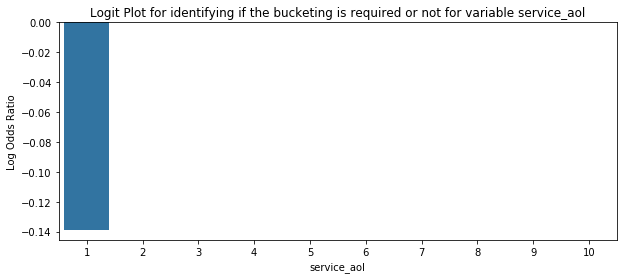

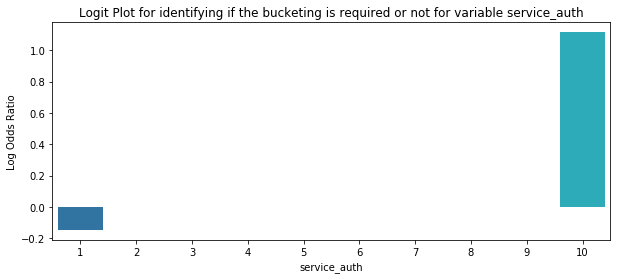

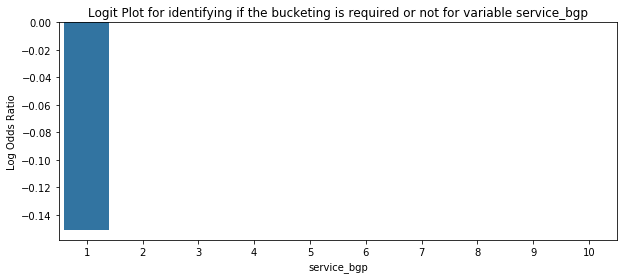

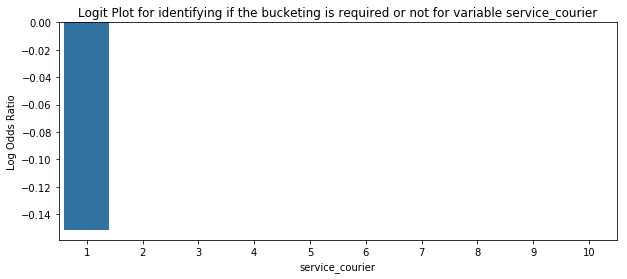

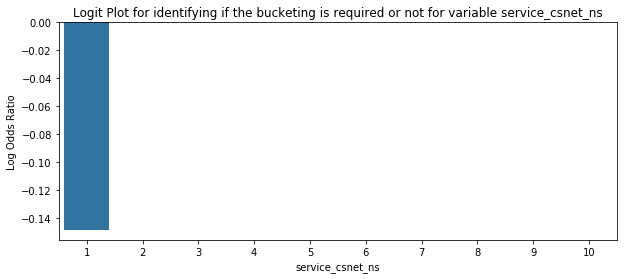

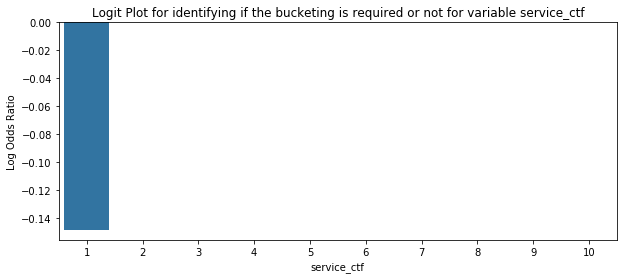

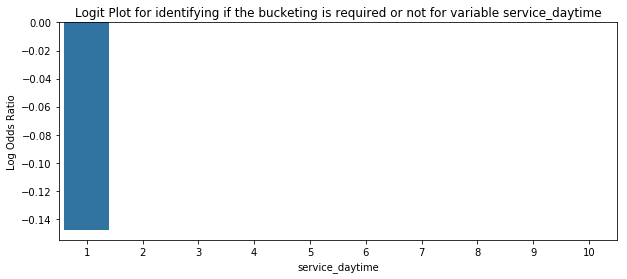

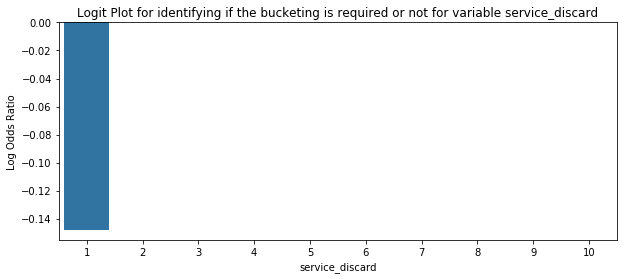

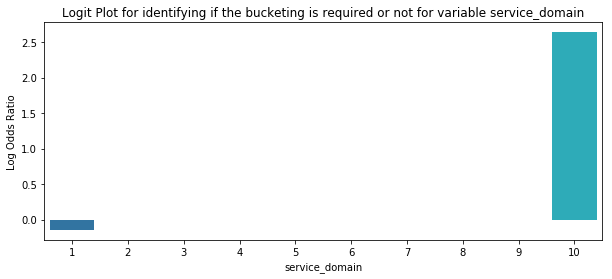

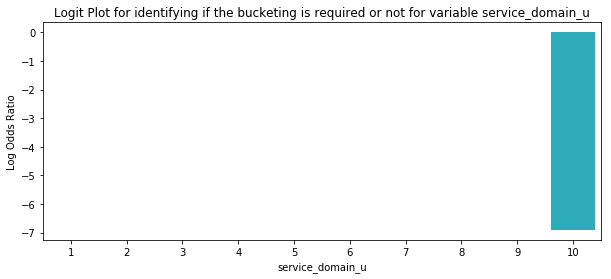

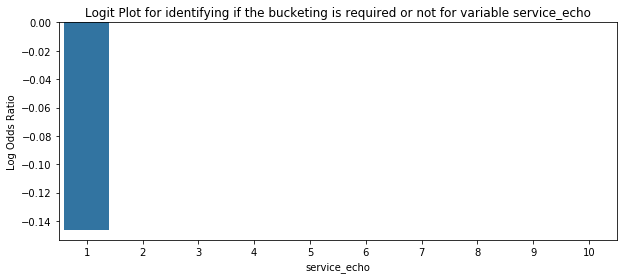

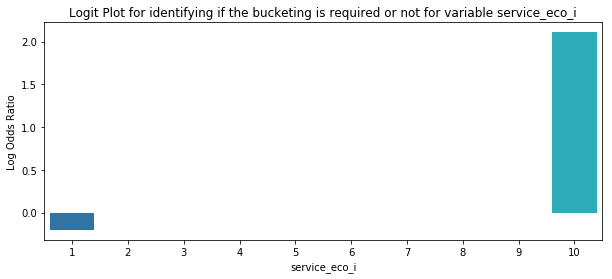

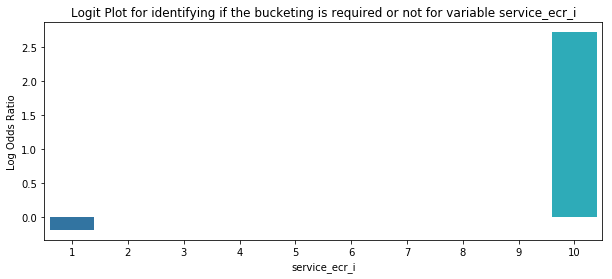

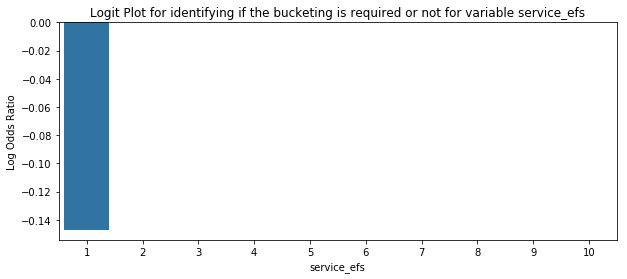

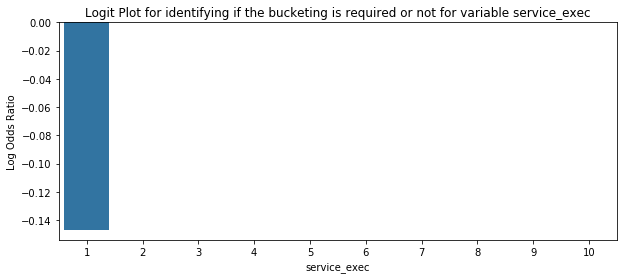

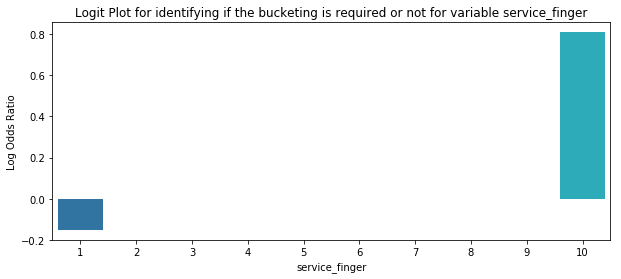

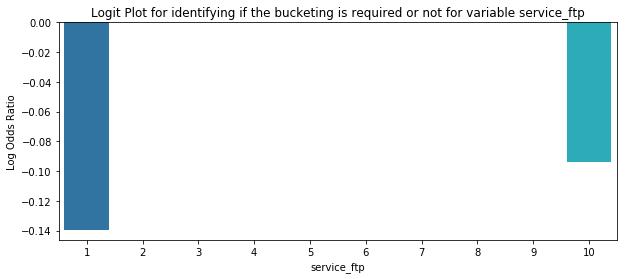

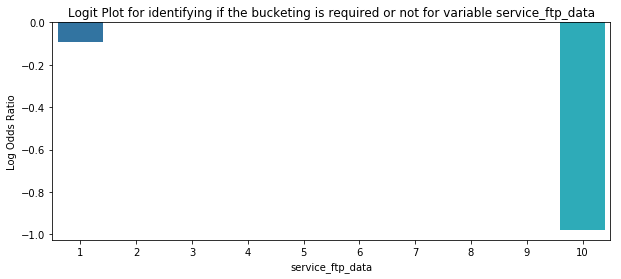

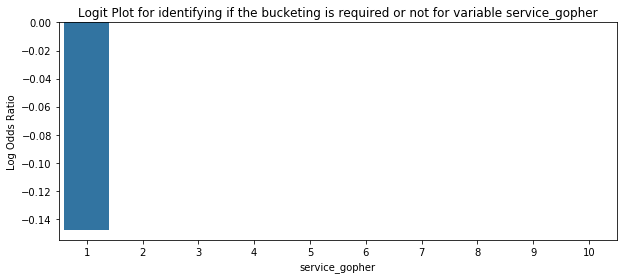

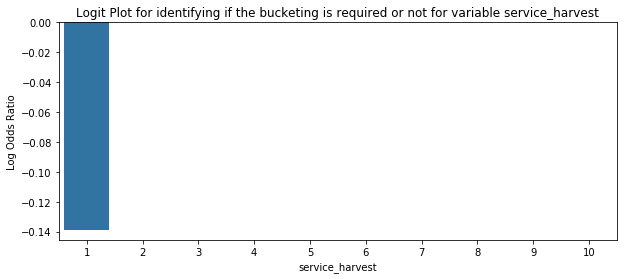

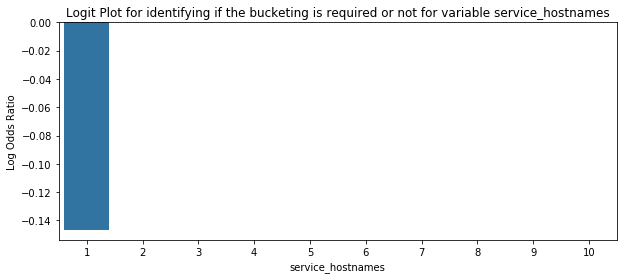

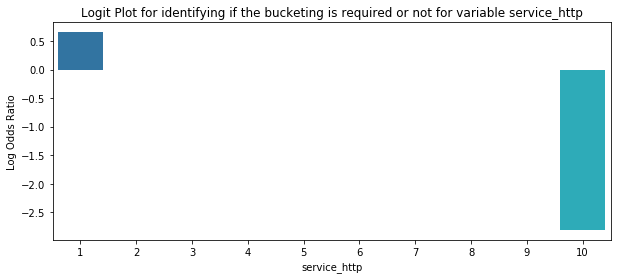

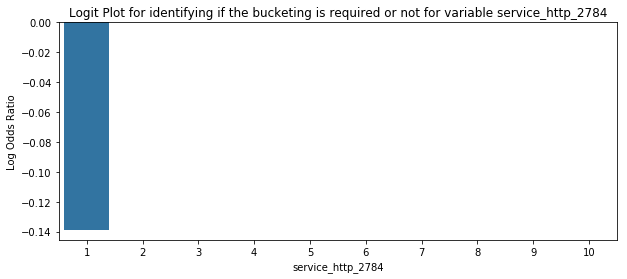

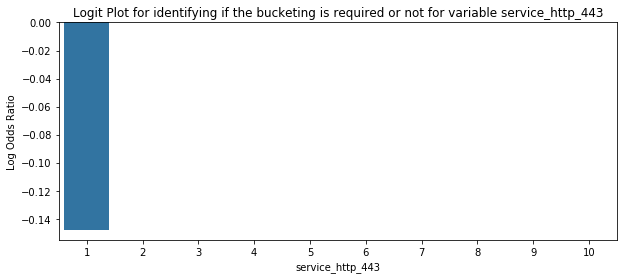

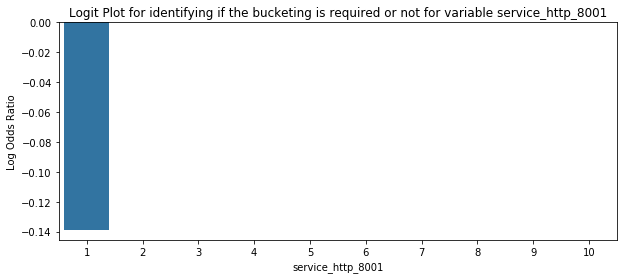

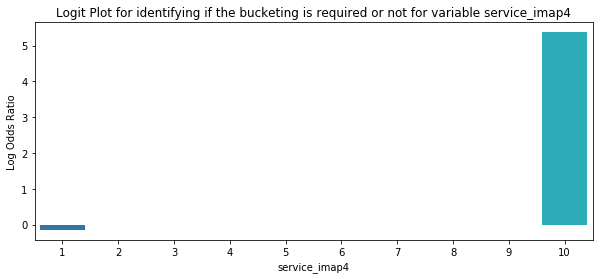

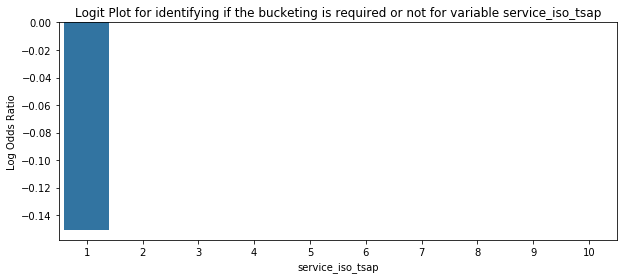

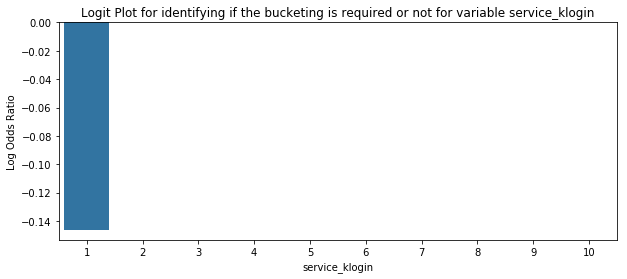

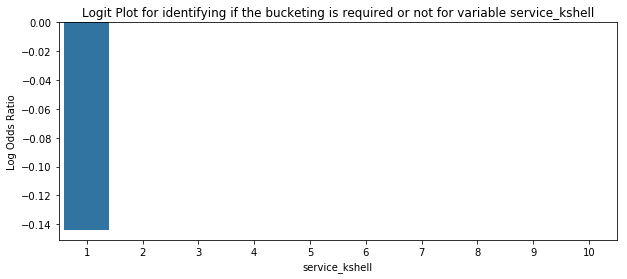

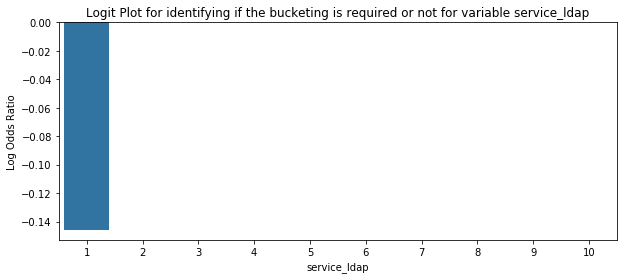

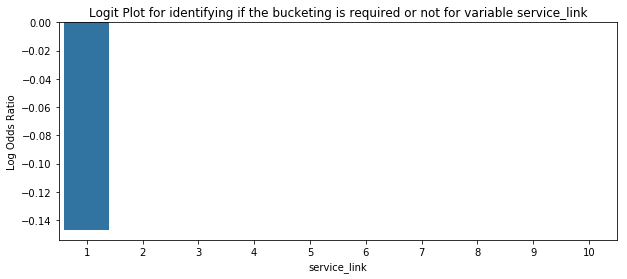

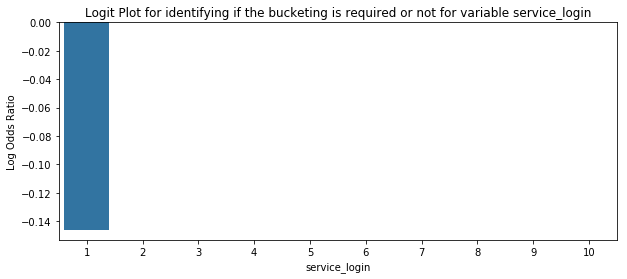

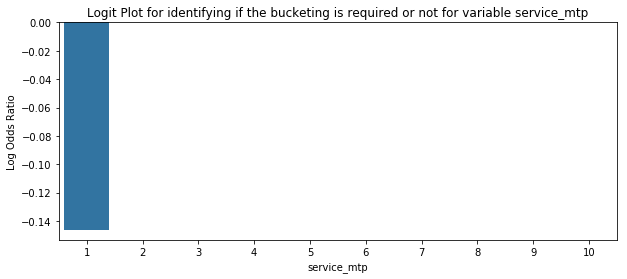

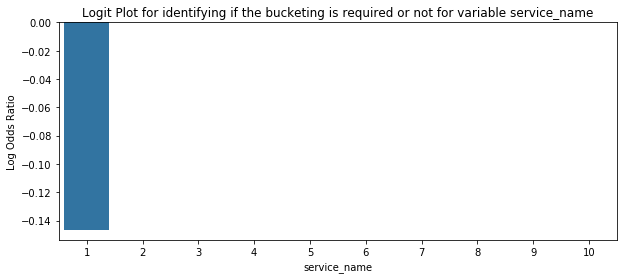

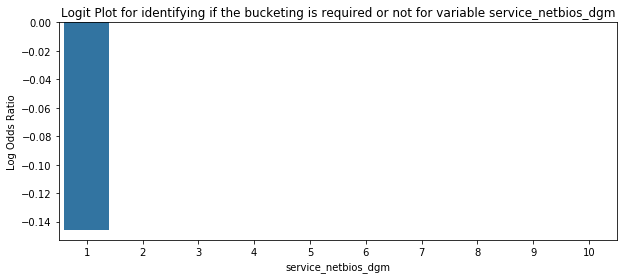

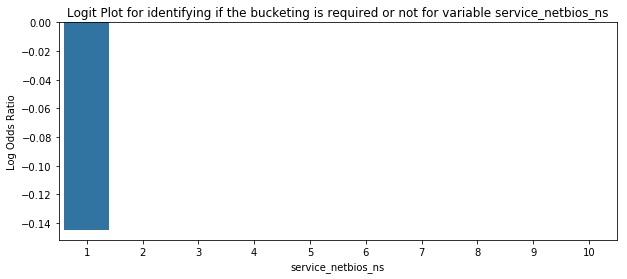

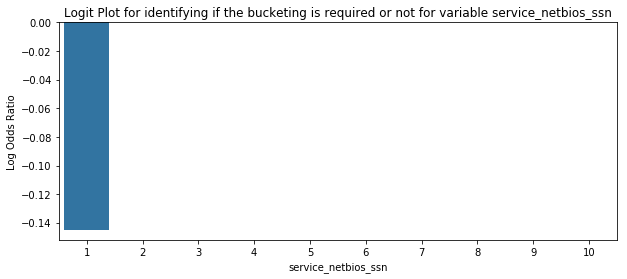

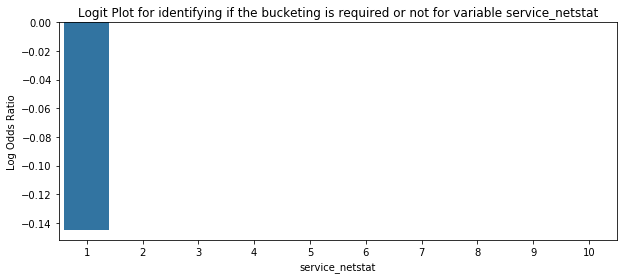

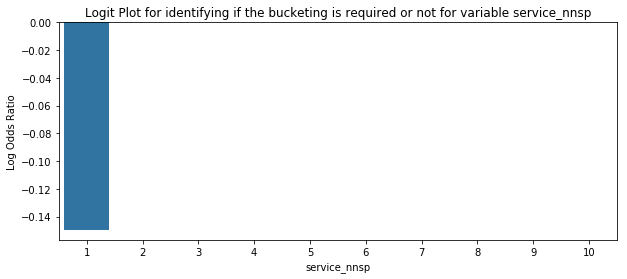

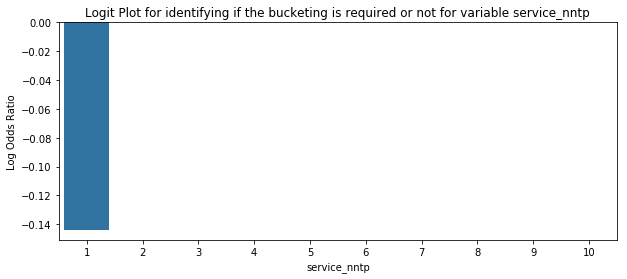

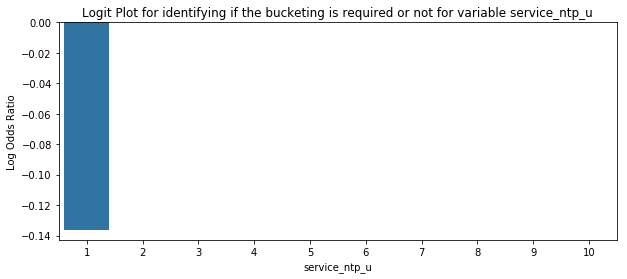

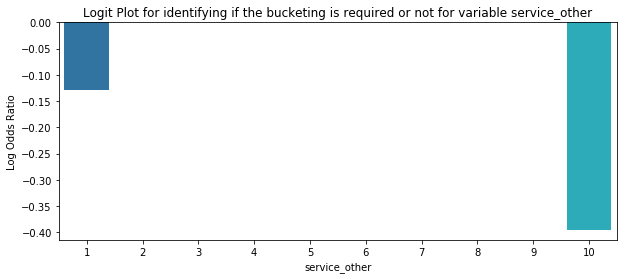

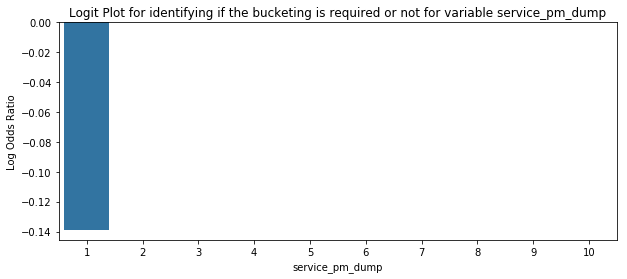

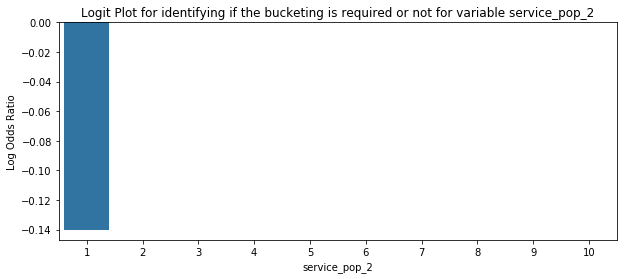

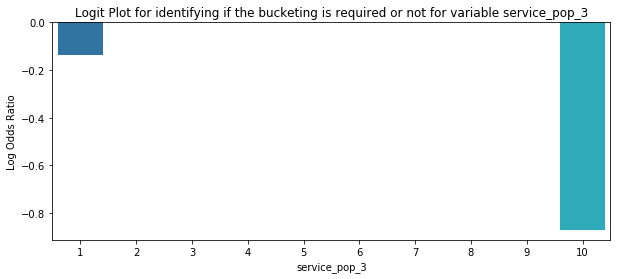

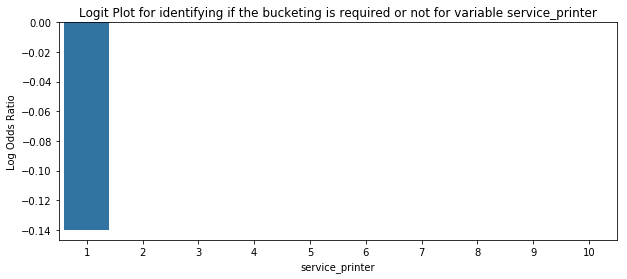

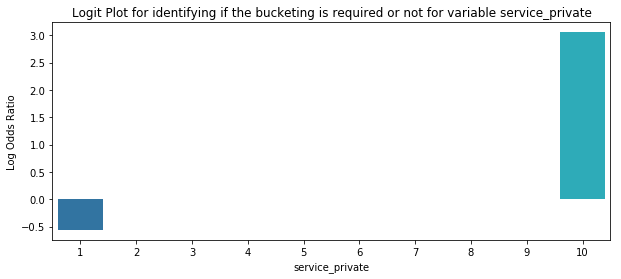

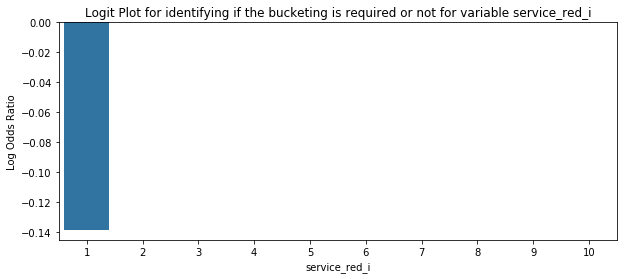

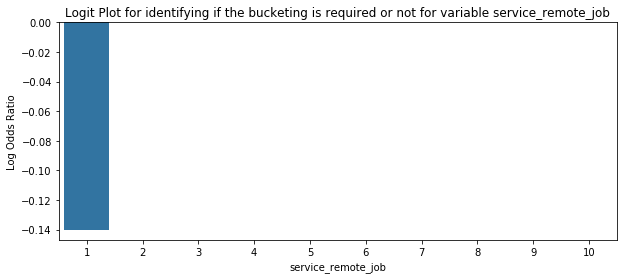

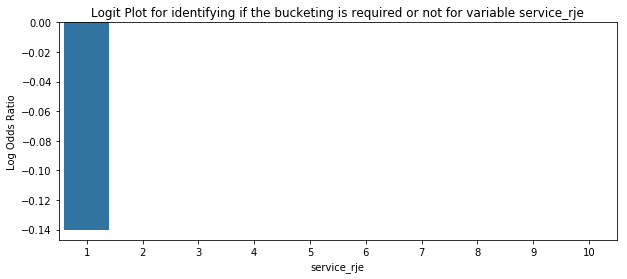

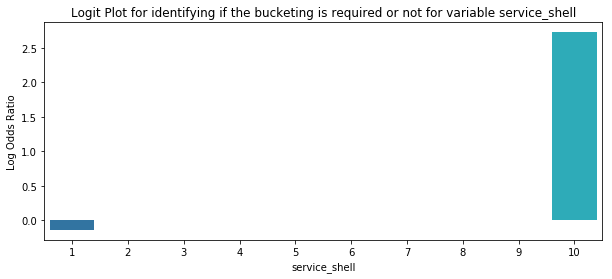

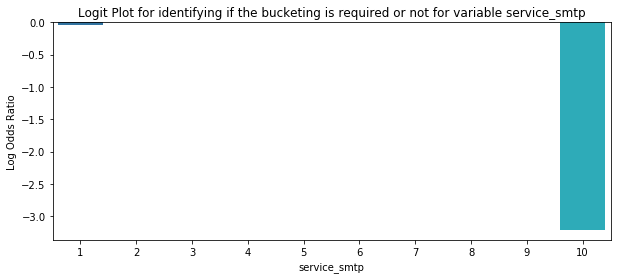

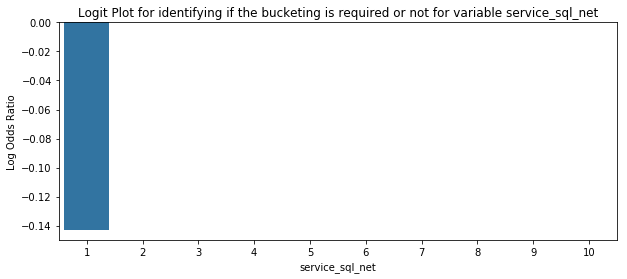

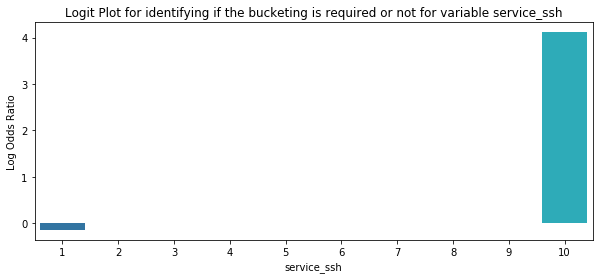

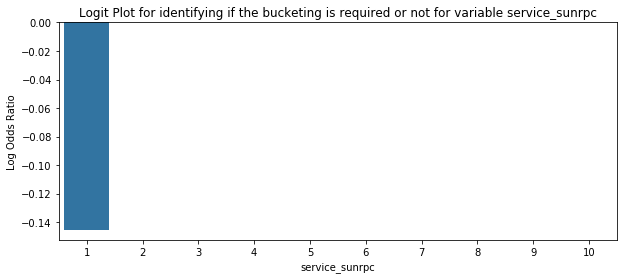

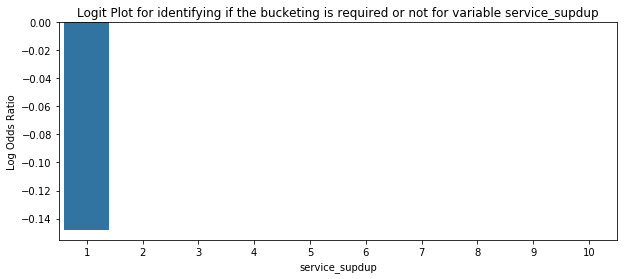

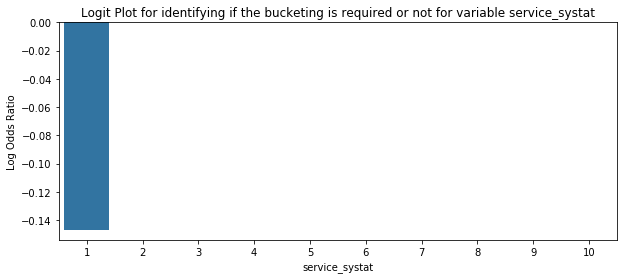

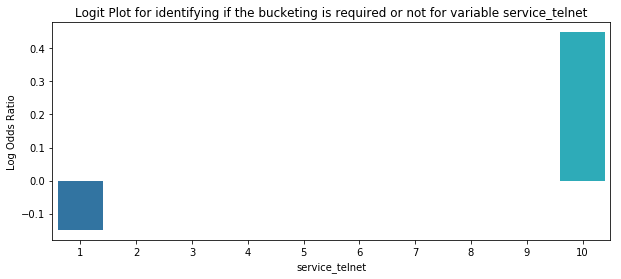

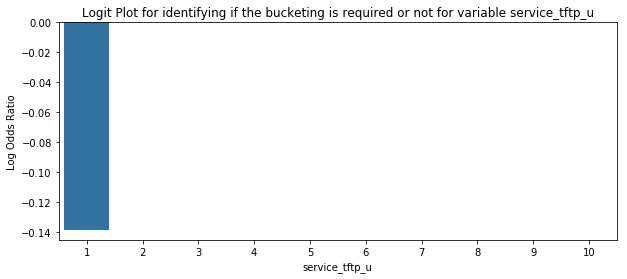

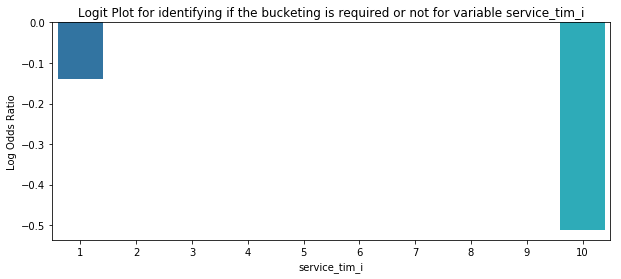

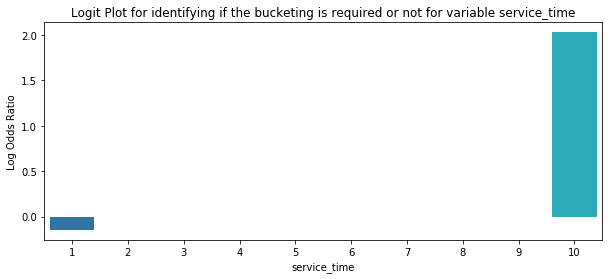

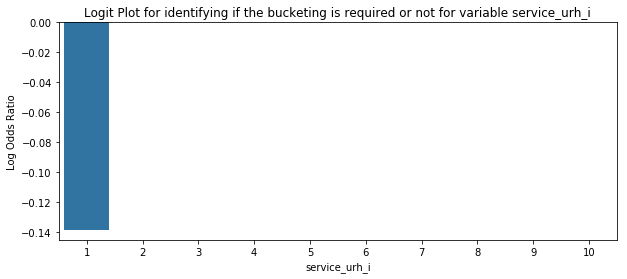

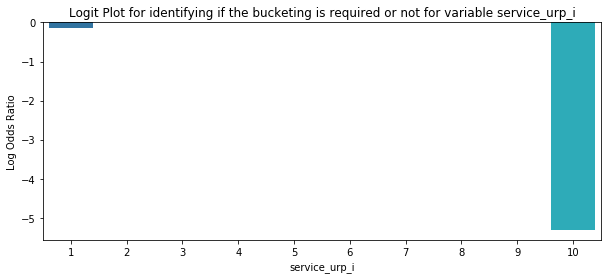

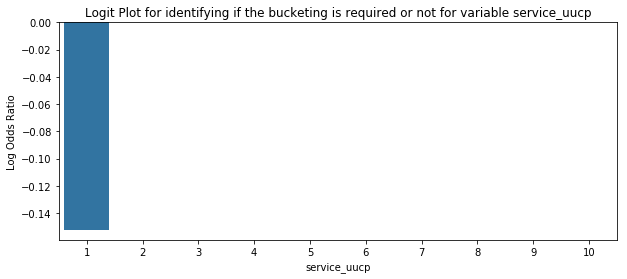

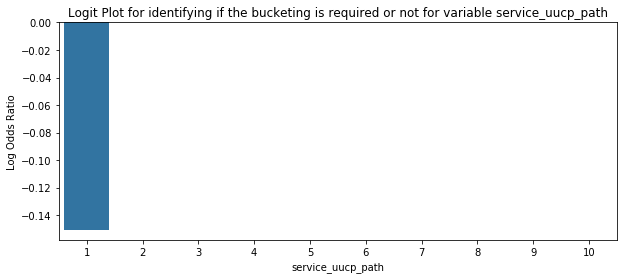

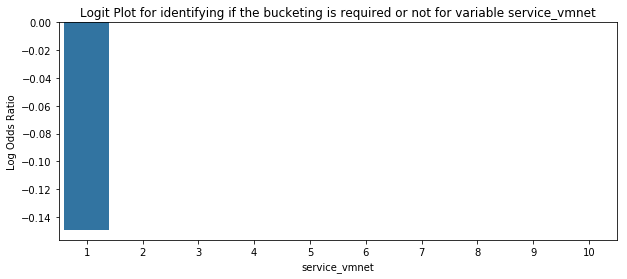

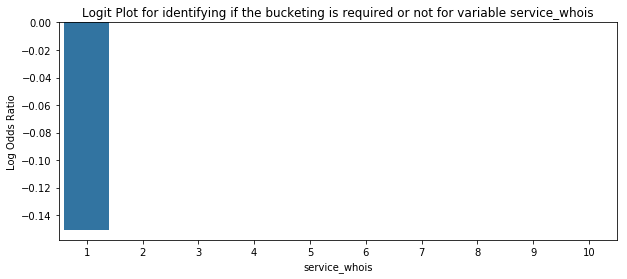

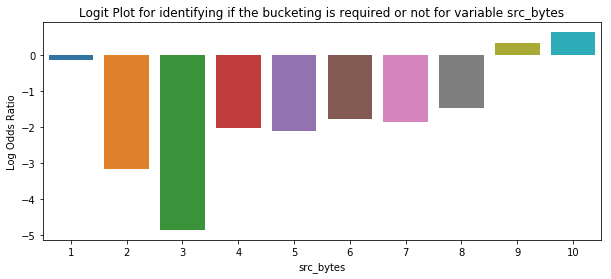

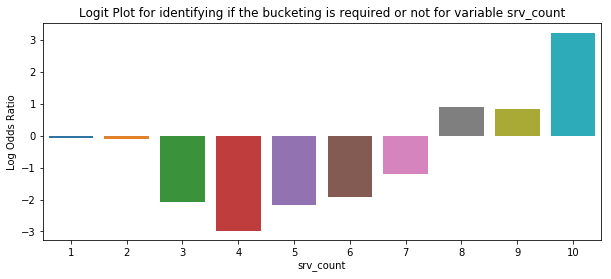

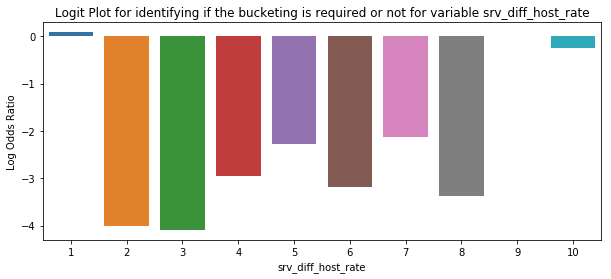

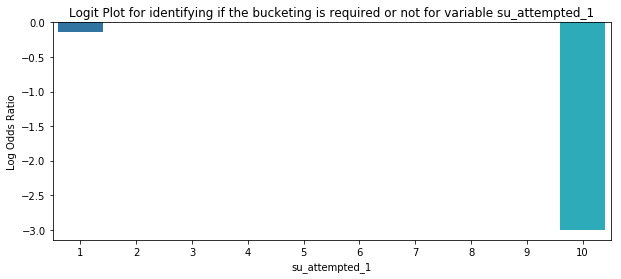

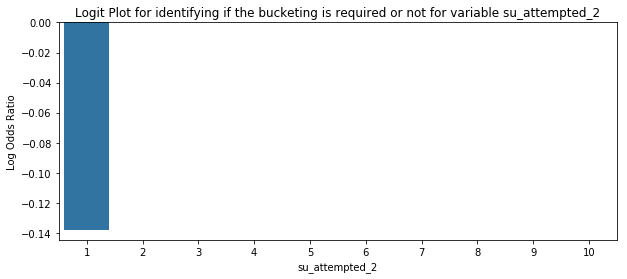

In [461]:
# bp = PdfPages('WOE Plots.pdf')

for feature in data_new.columns.difference(['target']):
    binned = pd.cut(data_new[feature], bins=10, labels=list(range(1,11)))
    #binned = binned.dropna()
    odds = data_new.groupby(binned)['target'].sum() / (data_new.groupby(binned)['target'].count()-data_new.groupby(binned)['target'].sum())
    log_odds = np.log(odds)
    fig,axes = plt.subplots(figsize=(10,4))
    sns.barplot(x=log_odds.index,y=log_odds)
    plt.ylabel('Log Odds Ratio')
    plt.title(str('Logit Plot for identifying if the bucketing is required or not for variable ') + str(feature))
#     bp.savefig(fig)

# bp.close()

In [474]:
# Features from WOE plots:
WOE_list = ['count',
           'diff_srv_rate',
           'dst_bytes',
           'dst_host_count',
           'dst_host_diff_srv_rate',
           'dst_host_same_src_port_rate',
           'dst_host_srv_count',
           'dst_host_diff_host_rate',
           'duration',
           'flag_RE',
           'flag_RSTO',
           'last_flag',
           'rerror_rate',
           'same_srv_rate',
           'serror_rate',
           'src_bytes',
           'srv_count']

In [462]:
import statsmodels.formula.api as sm
from sklearn import metrics 

In [463]:
data_new.columns

Index(['count', 'diff_srv_rate', 'dst_bytes', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_count', 'dst_host_srv_diff_host_rate', 'duration', 'hot',
       ...
       'service_tim_i', 'service_time', 'service_urh_i', 'service_urp_i',
       'service_uucp', 'service_uucp_path', 'service_vmnet', 'service_whois',
       'su_attempted_1', 'su_attempted_2'],
      dtype='object', length=107)

In [464]:
somersd_df = pd.DataFrame()
for feature in data_new.columns.difference(['target']):
    print(feature)
    logreg = sm.logit(formula=str('target ~ ')+str(feature), data=data_new)
    result = logreg.fit(maxiter=10)
    y_score = pd.DataFrame(result.predict())
    y_score.columns = ['score']
    somers_d = 2 * metrics.roc_auc_score(y_score=y_score, y_true=data_new.target) - 1
    temp = pd.DataFrame([feature, somers_d]).T
    temp.columns = ['Feature','SomersD']
    somersd_df = pd.concat([somersd_df,temp],axis=0)

count
Optimization terminated successfully.
         Current function value: 0.474707
         Iterations 7
diff_srv_rate
Optimization terminated successfully.
         Current function value: 0.666611
         Iterations 6
dst_bytes
Optimization terminated successfully.
         Current function value: 0.594466
         Iterations 8
dst_host_count
Optimization terminated successfully.
         Current function value: 0.615406
         Iterations 5
dst_host_diff_srv_rate
Optimization terminated successfully.
         Current function value: 0.656414
         Iterations 6
dst_host_same_src_port_rate
Optimization terminated successfully.
         Current function value: 0.686483
         Iterations 4
dst_host_srv_count
Optimization terminated successfully.
         Current function value: 0.380618
         Iterations 7
dst_host_srv_diff_host_rate
Optimization terminated successfully.
         Current function value: 0.689234
         Iterations 4
duration
Optimization terminated successf

C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.680423
         Iterations 7
flag_S0
Optimization terminated successfully.
         Current function value: 0.433831
         Iterations 9
flag_S1
Optimization terminated successfully.
         Current function value: 0.689106
         Iterations 8
flag_S2
Optimization terminated successfully.
         Current function value: 0.690350
         Iterations 7
flag_S3
Optimization terminated successfully.
         Current function value: 0.690615
         Iterations 6
flag_SF
Optimization terminated successfully.
         Current function value: 0.366053
         Iterations 6
flag_SH
Optimization terminated successfully.
         Current function value: 0.689201
         Iterations 9
hot
Optimization terminated successfully.
         Current function value: 0.690731
         Iterations 3
is_guest_login_1
Optimization terminated successfully.
         Current function value: 0.689943
         Iterations 5
is_host_login

C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



Optimization terminated successfully.
         Current function value: 0.410201
         Iterations 7
num_compromised
Optimization terminated successfully.
         Current function value: 0.689482
         Iterations 5
protocol_type_tcp
Optimization terminated successfully.
         Current function value: 0.689334
         Iterations 4
protocol_type_udp
Optimization terminated successfully.
         Current function value: 0.664989
         Iterations 5
rerror_rate
Optimization terminated successfully.
         Current function value: 0.657051
         Iterations 5
root_shell_1
Optimization terminated successfully.
         Current function value: 0.690529
         Iterations 5
same_srv_rate
Optimization terminated successfully.
         Current function value: 0.358365
         Iterations 7
serror_rate
Optimization terminated successfully.
         Current function value: 0.437155
         Iterations 8
service_X11
Optimization terminated successfully.
         Current function valu

C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.690741
         Iterations: 10
service_auth
Optimization terminated successfully.
         Current function value: 0.689444
         Iterations 5
service_bgp
         Current function value: 0.686424
         Iterations: 10
service_courier
         Current function value: 0.686277
         Iterations: 10
service_csnet_ns


C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.687434
         Iterations: 10
service_ctf
         Current function value: 0.687324
         Iterations: 10
service_daytime


C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.687580
         Iterations: 10
service_discard
         Current function value: 0.687477
         Iterations: 10
service_domain


C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.688439
         Iterations 7
service_domain_u
         Current function value: 0.643951
         Iterations: 10
service_echo


C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.688112
         Iterations: 10
service_eco_i
Optimization terminated successfully.
         Current function value: 0.675444
         Iterations 6
service_ecr_i
Optimization terminated successfully.
         Current function value: 0.677667
         Iterations 7
service_efs
         Current function value: 0.687800
         Iterations: 10
service_exec


C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.687867
         Iterations: 10
service_finger
Optimization terminated successfully.
         Current function value: 0.689271
         Iterations 5
service_ftp
Optimization terminated successfully.
         Current function value: 0.690750
         Iterations 3
service_ftp_data
Optimization terminated successfully.
         Current function value: 0.686302
         Iterations 5
service_gopher
         Current function value: 0.687599
         Iterations: 10
service_harvest
         Current function value: 0.690741
         Iterations: 10
service_hostnames


C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.687953
         Iterations: 10
service_http
Optimization terminated successfully.
         Current function value: 0.506479
         Iterations 7
service_http_2784

C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



         Current function value: 0.690747
         Iterations: 10
service_http_443
         Current function value: 0.687525
         Iterations: 10
service_http_8001


C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.690741
         Iterations: 10
service_imap4
Optimization terminated successfully.
         Current function value: 0.686965
         Iterations 9
service_iso_tsap


C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.686565
         Iterations: 10
service_klogin
         Current function value: 0.688118
         Iterations: 10
service_kshell


C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.688935
         Iterations: 10
service_ldap
         Current function value: 0.688258
         Iterations: 10
service_link


C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.687861
         Iterations: 10
service_login
         Current function value: 0.688142
         Iterations: 10
service_mtp


C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.688081
         Iterations: 10
service_name
         Current function value: 0.688008
         Iterations: 10
service_netbios_dgm


C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.688289
         Iterations: 10
service_netbios_ns
         Current function value: 0.688642
         Iterations: 10
service_netbios_ssn


C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.688551
         Iterations: 10
service_netstat
         Current function value: 0.688563
         Iterations: 10
service_nnsp

C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



         Current function value: 0.686914
         Iterations: 10
service_nntp

C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



         Current function value: 0.688953
         Iterations: 10
service_ntp_u

C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



         Current function value: 0.689917
         Iterations: 10
service_other
Optimization terminated successfully.
         Current function value: 0.690467
         Iterations 4
service_pm_dump

C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



         Current function value: 0.690723
         Iterations: 10
service_pop_2
         Current function value: 0.690280
         Iterations: 10
service_pop_3


C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.690627
         Iterations 5
service_printer
         Current function value: 0.690334
         Iterations: 10
service_private


C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.573117
         Iterations 7
service_red_i
         Current function value: 0.690714
         Iterations: 10
service_remote_job


C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.690280
         Iterations: 10
service_rje
         Current function value: 0.690231
         Iterations: 10
service_shell


C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.690482
         Iterations 7
service_smtp
Optimization terminated successfully.
         Current function value: 0.662312
         Iterations 7
service_sql_net
         Current function value: 0.689264
         Iterations: 10
service_ssh
Optimization terminated successfully.
         Current function value: 0.689071
         Iterations 8
service_sunrpc


C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.688435
         Iterations: 10
service_supdup
         Current function value: 0.687440
         Iterations: 10
service_systat


C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.687849
         Iterations: 10
service_telnet
Optimization terminated successfully.
         Current function value: 0.689950
         Iterations 4
service_tftp_u

C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



         Current function value: 0.690738
         Iterations: 10
service_tim_i
Optimization terminated successfully.
         Current function value: 0.690752
         Iterations 4
service_time
Optimization terminated successfully.

C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



         Current function value: 0.688722
         Iterations 6
service_urh_i
         Current function value: 0.690704
         Iterations: 10
service_urp_i

C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



Optimization terminated successfully.
         Current function value: 0.687897
         Iterations 9
service_uucp
         Current function value: 0.685996
         Iterations: 10
service_uucp_path
         Current function value: 0.686553
         Iterations: 10
service_vmnet


C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.686994
         Iterations: 10
service_whois
         Current function value: 0.686529
         Iterations: 10
src_bytes
Optimization terminated successfully.
         Current function value: 0.690744
         Iterations 3


C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


srv_count
Optimization terminated successfully.
         Current function value: 0.690751
         Iterations 3
srv_diff_host_rate
Optimization terminated successfully.
         Current function value: 0.683325
         Iterations 5
su_attempted_1
Optimization terminated successfully.
         Current function value: 0.690680
         Iterations 7
su_attempted_2
         Current function value: 0.690460
         Iterations: 10


C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [465]:
somersd_df.sort_values(by='SomersD',ascending=False)

,Feature,SomersD
0,dst_bytes,0.799045
0,src_bytes,0.797325
0,dst_host_srv_count,0.784961
0,same_srv_rate,0.747816
0,flag_SF,0.744313
0,diff_srv_rate,0.689472
0,logged_in_1,0.676619
0,dst_host_diff_srv_rate,0.653356
0,count,0.641608
0,serror_rate,0.612409


In [466]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [467]:
X = data_new[data_new.columns.difference(['target'])]
logreg = LogisticRegression()
rfe = RFE(logreg, 15)
rfe = rfe.fit(X, data_new['target'])

In [468]:
rfe_features = X.columns[rfe.get_support()]
selected_features_from_RFE = X[rfe_features]
selected_features_from_RFE.head()

,dst_host_srv_diff_host_rate,flag_S0,flag_S1,flag_S2,land_1,num_compromised,rerror_rate,serror_rate,service_eco_i,service_ecr_i,service_http,service_private,service_smtp,service_telnet,su_attempted_2
0,0.00,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0
1,0.00,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0.00,1,0,0,0,0.0,0.0,1.0,0,0,0,1,0,0,0
3,0.04,0,0,0,0,0.0,0.0,0.2,0,0,1,0,0,0,0
4,0.00,0,0,0,0,0.0,0.0,0.0,0,0,1,0,0,0,0


In [469]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif

In [472]:
X = data_new[data_new.columns.difference(['target'])]
skb = SelectKBest(f_classif, k=15).fit(X, data_new[['target']] )

C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [473]:
skb_features = X.columns[skb.get_support()]
selected_features_from_selectKBest = X[skb_features]
selected_features_from_selectKBest.head()

,count,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_srv_count,flag_S0,flag_SF,last_flag,logged_in_1,rerror_rate,same_srv_rate,serror_rate,service_domain_u,service_http,service_private
0,2.0,0.0,150.0,0.03,25.0,0,1,20.0,0,0.0,1.00,0.0,0,0,0
1,13.0,0.0,255.0,0.60,1.0,0,1,15.0,0,0.0,0.08,0.0,0,0,0
2,123.0,0.0,255.0,0.05,26.0,1,0,19.0,0,0.0,0.05,1.0,0,0,1
3,5.0,8153.0,30.0,0.00,255.0,0,1,21.0,1,0.0,1.00,0.2,0,1,0
4,30.0,420.0,255.0,0.00,255.0,0,1,21.0,1,0.0,1.00,0.0,0,1,0
